In [2]:
library(tidyverse)
library(ComplexHeatmap)
library(gridExtra)
library(grid)

In [3]:
df = read_csv('/home/fer/Documents/cfDNA/Tumor/Data/TMB.csv')
head(df)

Rows: 38 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): ID_FINAL, ID, Status, Stage
dbl (4): Freq, KB, TMB/Kb, TMB/Mb

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID_FINAL,ID,Freq,KB,TMB/Kb,Status,Stage,TMB/Mb
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
UEB-0205,UEB_5,602,481.6,0.75250,Primary tratment-naive tumor,I,0.00075250
UEB-0208,UEB_29,651,520.8,0.81375,Primary tratment-naive tumor,I,0.00081375
UEB-0209,UEB_31,640,512.0,0.80000,Primary tratment-naive tumor,II,0.00080000
UEB-0212,UEB_35,628,502.4,0.78500,Primary tratment-naive tumor,I,0.00078500
UEB-0214,UEB_44,489,391.2,0.61125,Primary tratment-naive tumor,Unknown,0.00061125
UEB-0215,UEB_47,635,508.0,0.79375,Primary tratment-naive tumor,III,0.00079375


In [4]:
#Panel de 800 kb. 800/8 = 100 (unidades kb)
df$'TMB/100kb' <- df$Freq / 8
head(df)

ID_FINAL,ID,Freq,KB,TMB/Kb,Status,Stage,TMB/Mb,TMB/100kb
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
UEB-0205,UEB_5,602,481.6,0.75250,Primary tratment-naive tumor,I,0.00075250,75.250
UEB-0208,UEB_29,651,520.8,0.81375,Primary tratment-naive tumor,I,0.00081375,81.375
UEB-0209,UEB_31,640,512.0,0.80000,Primary tratment-naive tumor,II,0.00080000,80.000
UEB-0212,UEB_35,628,502.4,0.78500,Primary tratment-naive tumor,I,0.00078500,78.500
UEB-0214,UEB_44,489,391.2,0.61125,Primary tratment-naive tumor,Unknown,0.00061125,61.125
UEB-0215,UEB_47,635,508.0,0.79375,Primary tratment-naive tumor,III,0.00079375,79.375


In [5]:
# Panel de 800 kb. 800/800 = 1 (unidades kb)
df$Freq / 800

[1] 0.75250 0.81375 0.80000 0.78500 0.61125 0.79375 0.75250 0.91125 0.80625
[10] 0.73250 0.65875 0.75625 1.30500 0.87125 0.84375 1.05500 0.68250 0.60875
[19] 0.73625 0.66875 0.79750 0.80625 0.75750 0.67000 0.66125 0.32500 0.69125
[28] 1.15375 0.67125 0.95125 0.69750 0.58625 0.64375 0.63875 0.53250 0.72125
[37] 0.68375 0.67750

In [6]:
df <-df[order( df$Status, df$'TMB/Kb'),]

In [7]:
mean_df = mean(df$'TMB/Kb')

max_df = max(df$'TMB/Kb')
#min_df = min(df$'TMB/Kb')

mean_df/1.35

[1] 0.5577241

In [8]:
mat = as.matrix(df)
rownames(mat) = mat[, 1]
m = as.matrix(mat[, 6])
colnames(m) = c('TumorType')
head(m)

,TumorType
UEB-0236,Primary tratment-naive tumor
UEB-0214,Primary tratment-naive tumor
UEB-0221,Primary tratment-naive tumor
UEB-0238,Primary tratment-naive tumor
UEB-0235,Primary tratment-naive tumor
UEB-0219,Primary tratment-naive tumor


In [9]:
head(m)

,TumorType
UEB-0236,Primary tratment-naive tumor
UEB-0214,Primary tratment-naive tumor
UEB-0221,Primary tratment-naive tumor
UEB-0238,Primary tratment-naive tumor
UEB-0235,Primary tratment-naive tumor
UEB-0219,Primary tratment-naive tumor


In [10]:
st = as.character(as.list(df$Stage))
st

[1] "II"      "Unknown" "III"     "II"      "II"      "III"     "II"     
 [8] "I"       "I"       "II"      "I"       "III"     "II"      "II"     
[15] "III"     "III"     "I"       "Unknown" "II"      "Unknown" "III"    
[22] "II"      "II"      "III"     "III"     "II"      "III"     "II"     
[29] "III"     "II"      "III"     "II"      "III"     "II"      "II"     
[36] "III"     "III"     "Unknown"

In [10]:
options(repr.plot.width = 16, repr.plot.height = 8)
#pdf("/home/fer/TMB.pdf", width = 16, height = 8)

paletteLength <- 38

myColor <- viridis::viridis(paletteLength)
myColor2 <- viridis::plasma(paletteLength)
#myColor2 <- viridis::inferno(paletteLength)


#===============================Heatmap==============================#

Heatmap(t(m), name = "TumorType", 
        column_split = factor(rep(c("P", "TT", 'Unknown'), c(22,15,5))),
        col = c('Treated Tumor'='red', 'Primary tratment-naive tumor' = 'blue', 
                'Unknown'="#DCDFE7"),
        
        top_annotation = HeatmapAnnotation(mutations = anno_barplot( border = FALSE,
        c(df$'TMB/Kb'), gp = gpar(fill=myColor2, col = myColor2),
        height = unit(16, "cm"), 
        ),  annotation_name_gp= gpar(fontsize = 0.01)
                                          ),
        
        bottom_annotation = HeatmapAnnotation(Stage = st, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                             ))
       )


#=============================Decorations===========================#




for (i in c(1,2,3)) {
    decorate_annotation("mutations", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}


decorate_annotation("mutations", {
    grid.text("mutations/Kb", unit(0, "mm"), just = "left", rot = 90, vjust =-1, hjust = 0.5,
    gp=gpar(fontsize=13))},
                    slice = 1)



#decorate_annotation("mutations", {
#    grid.text("P = Primary treatment \n             -naïve tumors", unit(0, "mm"), just = "left", 
#              vjust = 7.3, hjust = -8.1, gp=gpar(fontsize=12))},
#                    slice = 1)
#decorate_annotation("mutations", {
#    grid.text("TT = Treated tumor", unit(0, "mm"), just = "left", vjust = 10, hjust = -9.5,
#    gp=gpar(fontsize=12))},
#                    slice = 1)



decorate_annotation("mutations", {
    grid.text('x̄ = 0.7529', unit(0, "mm"), just = "left", vjust = -4, hjust = -1,
    gp=gpar(fontsize=13))},
                    slice = 1)

#dev.off()

ERROR: Error: Length or ncol of `column_split` should be same as ncol of `matrix`.


In [11]:
mean_df

[1] 0.7529276

In [12]:
Custom = c(rep(c("blue", "red", '#DCDFE7'), c(22,15,1)))
#Custom = c('blue','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 
#           'red', 'red', 'red','red', 'red', 'red','red', 'red', 'red',
#           'red', 'red', 'red','red', 'red', 'red','red', 'red', 'red',
#           'red', 'red', 'red','red', 'red', 'red','red', 'red', 
#            '#DCDFE7', '#DCDFE7', '#DCDFE7',
#            '#DCDFE7', '#DCDFE7')
Custom

[1] "blue"    "blue"    "blue"    "blue"    "blue"    "blue"    "blue"   
 [8] "blue"    "blue"    "blue"    "blue"    "blue"    "blue"    "blue"   
[15] "blue"    "blue"    "blue"    "blue"    "blue"    "blue"    "blue"   
[22] "blue"    "red"     "red"     "red"     "red"     "red"     "red"    
[29] "red"     "red"     "red"     "red"     "red"     "red"     "red"    
[36] "red"     "red"     "#DCDFE7"

In [13]:
#library(circlize)
#col_fun = colorRamp2(c(22,15,1), c("blue", "white", "red"))

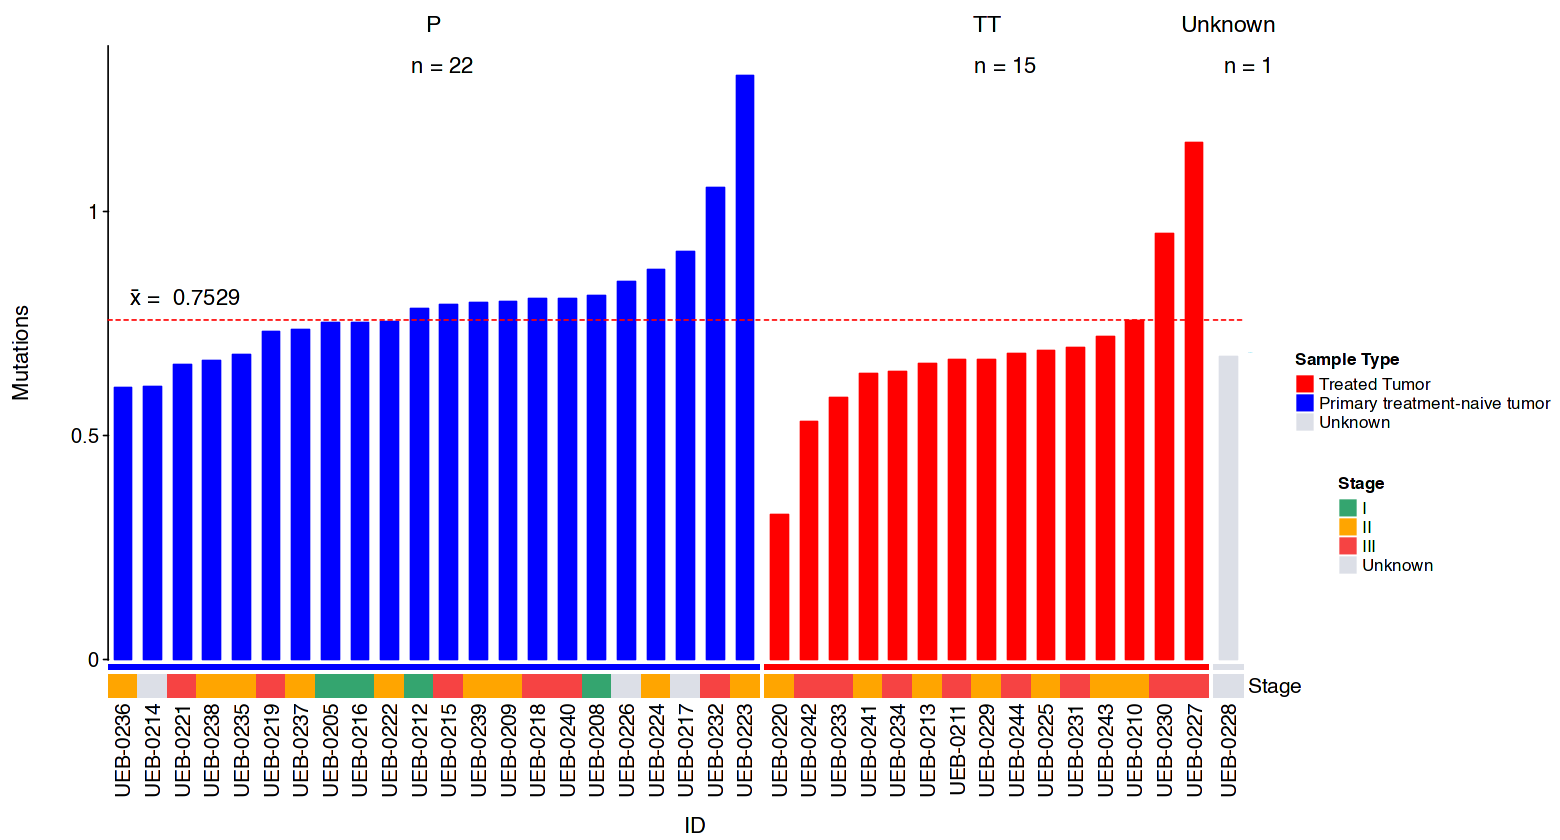

In [14]:
options(repr.plot.width = 13, repr.plot.height = 7)

#pdf("/home/fer/B_TMB.pdf", width = 13, height = 7)

paletteLength <- 38

myColor <- viridis::viridis(paletteLength)
myColor2 <- viridis::plasma(paletteLength)
#myColor2 <- viridis::inferno(paletteLength)


#===============================Heatmap==============================#

ht = Heatmap(t(m), show_heatmap_legend = FALSE,
             height = unit(1, "mm"), show_row_names = FALSE, name = "TumorType",
            column_split = factor(rep(c("P", "TT", 'Unknown'), c(22,15,1))),
        col = c('Treated Tumor'='red', 'Primary tratment-naive tumor' = 'blue', 
                'Unknown'="#DCDFE7"),
        top_annotation = HeatmapAnnotation(mutations = anno_barplot( border = FALSE,
        c(df$'TMB/Kb'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(13, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),  annotation_name_gp= gpar(fontsize = 0.01) 
            #lgd = Legend(col_fun = col_fun, title = "foo", at = c(0, 0.25, 0.5, 0.75, 1))
                                          ),
        
        bottom_annotation = HeatmapAnnotation(Stage = st, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                             ), show_legend = FALSE), 
       )


#=============================Decorations===========================#

#Arriba, izquierda, abajo, derecha 
draw(ht,auto_adjust = TRUE, padding = unit(c(6, 15, 2, 55), "mm")) # add space for legens


for (i in c(1,2,3)) {
    decorate_annotation("mutations", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}


decorate_annotation("mutations", {
    grid.text("Mutations", unit(0, "mm"), just = "left", rot = 90, vjust =-5, hjust = 0.5,
    gp=gpar(fontsize=13))
    
    grid.text("ID", unit(0, "mm"), just = "left", vjust =30, hjust = -26,
    gp=gpar(fontsize=13))
},
                    slice = 1)

decorate_annotation("mutations", { 
    pushViewport(viewport(width = 0.9, height = 0.9))
    #grid.rect()  # border
    lgd1 = Legend(labels = c('Treated Tumor', 'Primary treatment-naive tumor',
                            'Unknown'), title = "Sample Type", 
                  legend_gp = gpar(fill = c("red", "blue", '#DCDFE7')))
    lgd2 = Legend(labels = c('I', 'II', 'III',
                            'Unknown'), title = "Stage", 
                  legend_gp = gpar(fill = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")))
    
    draw(lgd1, x = unit(2.4, "npc"), y = unit(0.5, "npc"), just = c("right", "top")) 
    draw(lgd2, x = unit(2.2, "npc"), y = unit(0.1, "npc"), just = c("right", "bottom"))

    popViewport()
},
                    slice = 1)

decorate_annotation("mutations", {
    grid.text("n = 22", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -4.9,
    gp=gpar(fontsize=13))
    
    grid.text("n = 15", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -13.99,
    gp=gpar(fontsize=13))
    
    grid.text("n = 1", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -22.5,
    gp=gpar(fontsize=13))
},
                    slice = 1)

#decorate_annotation("mutations", {
#    grid.text("P = Primary treatment \n             -naïve tumors", unit(0, "mm"), just = "left", 
#              vjust = 7.3, hjust = -8.1, gp=gpar(fontsize=12))},
#                    slice = 1)
#decorate_annotation("mutations", {
#    grid.text("TT = Treated tumor", unit(0, "mm"), just = "left", vjust = 10, hjust = -9.5,
#    gp=gpar(fontsize=12))},
#                    slice = 1)



decorate_annotation("mutations", {
    grid.text('x̄ =  0.7529', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)

#dev.off()

In [14]:
mean(df$'TMB/Kb')

[1] 0.7529276

In [21]:
options(repr.plot.width = 13, repr.plot.height = 7)

cairo_pdf ("/home/fer/A_TMB.pdf", width = 13, height = 7)

paletteLength <- 38

myColor <- viridis::viridis(paletteLength)
myColor2 <- viridis::plasma(paletteLength)
#myColor2 <- viridis::inferno(paletteLength)


#===============================Heatmap==============================#

ht = Heatmap(t(m), show_heatmap_legend = FALSE,
             height = unit(1, "mm"), show_row_names = FALSE, #name = "Sample Type",
            column_split = factor(rep(c("P", "TT", 'Unknown'), c(22,15,1))),
        col = c('Treated Tumor'='red', 'Primary tratment-naive tumor' = 'blue', 
                'Unknown'="#DCDFE7"),
        top_annotation = HeatmapAnnotation(mutations = anno_barplot( border = FALSE, #add_numbers = TRUE, 
        c(df$'Freq'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(13, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),  annotation_name_gp= gpar(fontsize = 0.01) 
            #lgd = Legend(col_fun = col_fun, title = "foo", at = c(0, 0.25, 0.5, 0.75, 1))
                                          ),
        
        bottom_annotation = HeatmapAnnotation(Stage = st, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                             ), show_legend = FALSE), 
       )


#=============================Decorations===========================#

#Abajo, izquierda, arriba, derecha 
draw(ht,auto_adjust = TRUE, padding = unit(c(18, 8, 0, 60), "mm")) # add space for legens


for (i in c(1,2,3)) {
    decorate_annotation("mutations", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}


decorate_annotation("mutations", {
    grid.text("mutations", unit(0, "mm"), just = "left", rot = 90, vjust =-3, hjust = 0.5,
    gp=gpar(fontsize=13))
    
    grid.text("mutations/kb", unit(0, "mm"), just = "left", rot = 90, vjust = 72, hjust = 0.5,
    gp=gpar(fontsize=13))
    
    grid.text("ID", unit(0, "mm"), just = "left", vjust =30, hjust = -23,
    gp=gpar(fontsize=13))
},
                    slice = 1)

decorate_annotation("mutations", { 
    pushViewport(viewport(width = 0.9, height = 0.9))
    #grid.rect()  # border
    lgd1 = Legend(labels = c('Treated Tumor', 'Primary treatment-naïve tumor',
                            'Unknown'), title = "Sample Type", 
                  legend_gp = gpar(fill = c("red", "blue", '#DCDFE7')))
    lgd2 = Legend(labels = c('I', 'II', 'III',
                            'Unknown'), title = "Stage", 
                  legend_gp = gpar(fill = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")))
    
    draw(lgd1, x = unit(2.46, "npc"), y = unit(0.5, "npc"), just = c("right", "top")) 
    draw(lgd2, x = unit(2.18, "npc"), y = unit(0.1, "npc"), just = c("right", "bottom"))

    popViewport()
},
                    slice = 1)

decorate_annotation("mutations", {
    grid.text("n = 22", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -4.9,
    gp=gpar(fontsize=13))
    
    grid.text("n = 15", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -13.99,
    gp=gpar(fontsize=13))
    
    grid.text("n = 1", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -21.3,
    gp=gpar(fontsize=13))
},
                    slice = 1)



decorate_annotation("mutations", {
    grid.text('x̄ = 602.3421', unit(0, "mm"), just = "left",  rot = 90, vjust = -1, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)
decorate_annotation("mutations", {
    grid.text('x̄ = 0.7529', unit(0, "mm"), just = "left",  rot = 90, vjust = 4 , hjust = -0.28,
    gp=gpar(fontsize=13))},
                    slice = i)



decorate_annotation("mutations", {
    grid.lines(x = unit(c(1.1, 1.1), "npc"), # x-coordinates for start and end of line
               y = unit(c(0, 1), "npc"), # y-coordinates for start and end of line
               gp = gpar(col = "black", lwd = 1)) # line properties

    grid.lines(x = unit(c(1.1, 1.3), "npc"), # x-coordinates for start and end of line
               y = unit(c(0.912, 0.912), "npc"), # y-coordinates for start and end of line
               gp = gpar(col = "black", lwd = 1)) # line properties
    
    grid.lines(x = unit(c(1.1, 1.3), "npc"), # x-coordinates for start and end of line
               y = unit(c(0.456, 0.456), "npc"), # y-coordinates for start and end of line
               gp = gpar(col = "black", lwd = 1)) # line properties
    
    grid.lines(x = unit(c(1.1, 1.3), "npc"), # x-coordinates for start and end of line
               y = unit(c(0, 0), "npc"), # y-coordinates for start and end of line
               gp = gpar(col = "black", lwd = 1)) # line properties
    # Add text at the start, middle and end of the line
    grid.text("0", x = unit(1.5, "npc"), y = unit(0, "npc"), just="left", gp=gpar(col="black"))
    grid.text("0.6", x = unit(1.5, "npc"), y = unit(0.456, "npc"), just="left", gp=gpar(col="black"))
    grid.text("1.2", x = unit(1.5, "npc"), y = unit(0.912, "npc"), just="left", gp=gpar(col="black"))
}, slice = i)


dev.off()

png 
  2

# mean(df$Freq)

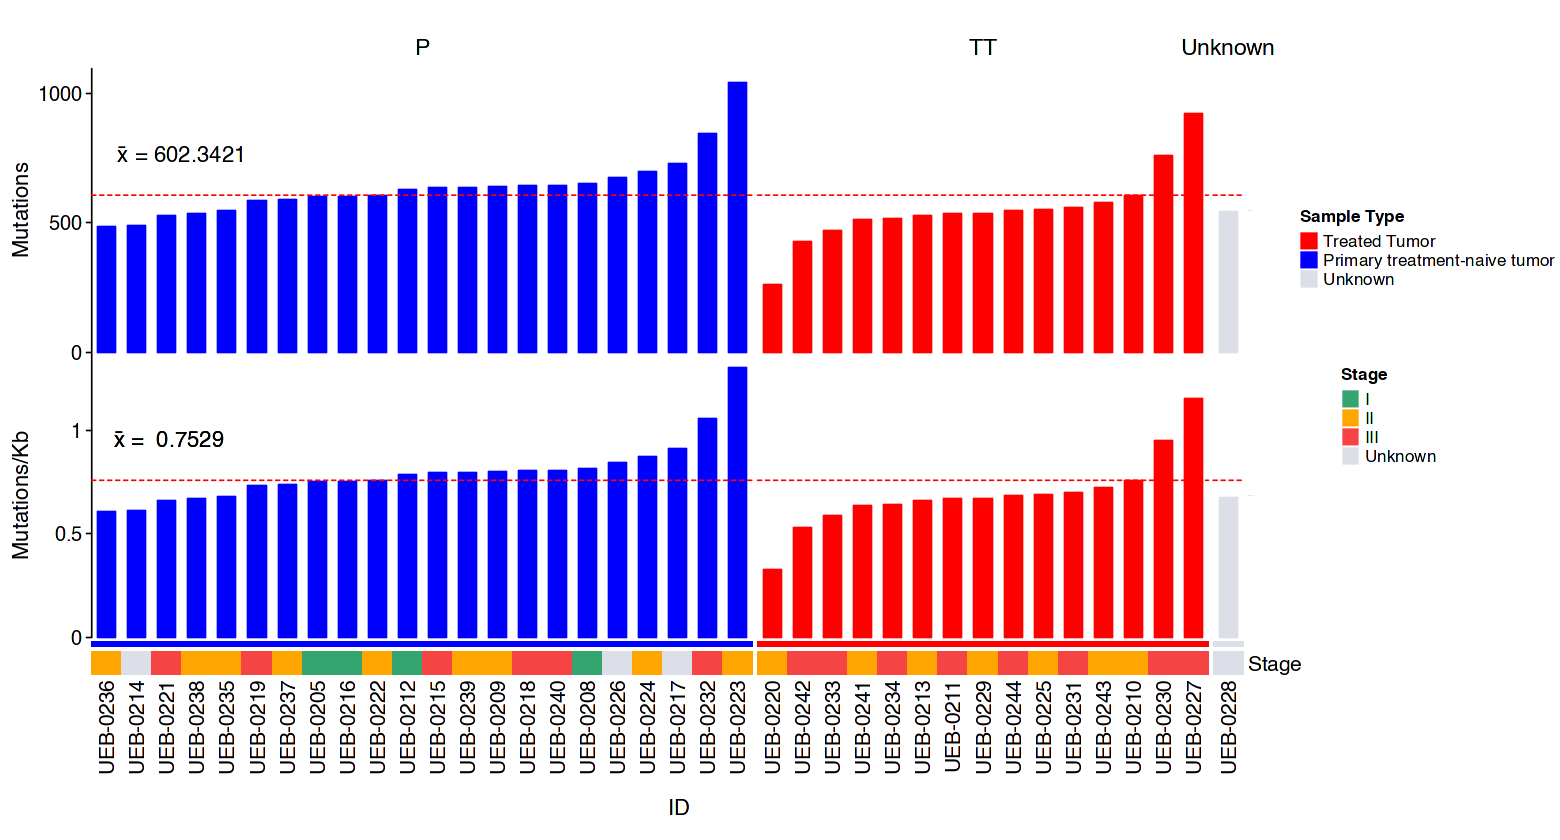

In [18]:
options(repr.plot.width = 13, repr.plot.height = 7)

#pdf("/home/fer/A_TMB.pdf", width = 13, height = 7)

paletteLength <- 38

myColor <- viridis::viridis(paletteLength)
myColor2 <- viridis::plasma(paletteLength)
#myColor2 <- viridis::inferno(paletteLength)


#===============================Heatmap==============================#

ht = Heatmap(t(m), show_heatmap_legend = FALSE,
             height = unit(1, "mm"), show_row_names = FALSE, name = "Sample Type",
            column_split = factor(rep(c("P", "TT", 'Unknown'), c(22,15,1))),
        col = c('Treated Tumor'='red', 'Primary tratment-naive tumor' = 'blue', 
                'Unknown'="#DCDFE7"),
        top_annotation = HeatmapAnnotation(mutations = anno_barplot( border = FALSE,
        c(df$'Freq'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(6, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),mutations_kb = anno_barplot( border = FALSE,
        c(df$'TMB/Kb'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(6, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),
                annotation_name_gp= gpar(fontsize = 0.01) 
            #lgd = Legend(col_fun = col_fun, title = "foo", at = c(0, 0.25, 0.5, 0.75, 1))
                                          ),
        
        bottom_annotation = HeatmapAnnotation(Stage = st, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                             ), show_legend = FALSE), 
       )


#=============================Decorations===========================#

#Arriba, izquierda, abajo, derecha 
draw(ht,auto_adjust = TRUE, padding = unit(c(6, 8, 2, 55), "mm")) # add space for legens


for (i in c(1,2,3)) {
    decorate_annotation("mutations", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}
for (i in c(1,2,3)) {
    decorate_annotation("mutations_kb", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}


decorate_annotation("mutations_kb", {
    grid.text('x̄ =  0.7529', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)





decorate_annotation("mutations", {
    grid.text("Mutations", unit(0, "mm"), just = "left", rot = 90, vjust =-4, hjust = 0.5,
    gp=gpar(fontsize=13))
},
                    slice = 1)


decorate_annotation("mutations_kb", {
    grid.text("Mutations/Kb", unit(0, "mm"), just = "left", rot = 90, vjust =-4, hjust = 0.5,
    gp=gpar(fontsize=13))
    
    grid.text("ID", unit(0, "mm"), just = "left", vjust =20, hjust = -26,
    gp=gpar(fontsize=13))
},
                    slice = 1)



decorate_annotation("mutations", { 
    pushViewport(viewport(width = 0.9, height = 0.9))
    #grid.rect()  # border
    lgd1 = Legend(labels = c('Treated Tumor', 'Primary treatment-naive tumor',
                            'Unknown'), title = "Sample Type", 
                  legend_gp = gpar(fill = c("red", "blue", '#DCDFE7')))
    lgd2 = Legend(labels = c('I', 'II', 'III',
                            'Unknown'), title = "Stage", 
                  legend_gp = gpar(fill = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")))
    
    draw(lgd1, x = unit(2.4, "npc"), y = unit(0.5, "npc"), just = c("right", "top")) 
    draw(lgd2, x = unit(2.2, "npc"), y = unit(-0.5, "npc"), just = c("right", "bottom"))

    popViewport()
},
                    slice = 1)



decorate_annotation("mutations", {
    grid.text("n = 22", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -4.9,
    gp=gpar(fontsize=13))
    
    grid.text("n = 15", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -13.99,
    gp=gpar(fontsize=13))
    
    grid.text("n = 1", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -22.5,
    gp=gpar(fontsize=13))
},
                    slice = 1)




decorate_annotation("mutations", {
    grid.text('x̄ = 602.3421', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)
decorate_annotation("mutations_kb", {
    grid.text('x̄ =  0.7529', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)
#dev.off()

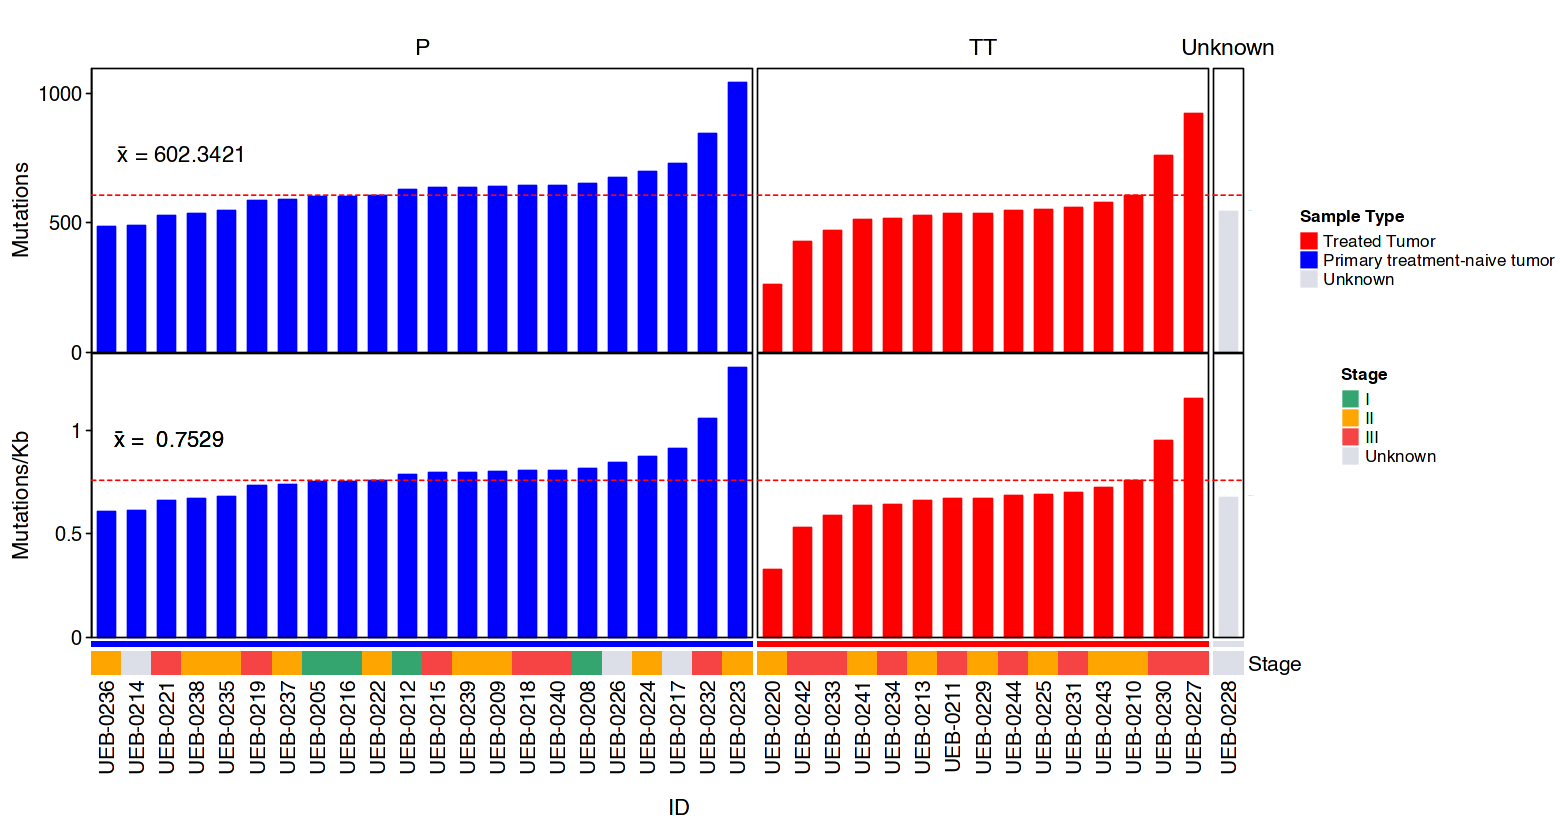

In [19]:
options(repr.plot.width = 13, repr.plot.height = 7)

#pdf("/home/fer/A_TMB.pdf", width = 13, height = 7)

paletteLength <- 38

myColor <- viridis::viridis(paletteLength)
myColor2 <- viridis::plasma(paletteLength)
#myColor2 <- viridis::inferno(paletteLength)


#===============================Heatmap==============================#

ht = Heatmap(t(m), show_heatmap_legend = FALSE,
             height = unit(1, "mm"), show_row_names = FALSE, name = "Sample Type",
            column_split = factor(rep(c("P", "TT", 'Unknown'), c(22,15,1))),
        col = c('Treated Tumor'='red', 'Primary tratment-naive tumor' = 'blue', 
                'Unknown'="#DCDFE7"),
        top_annotation = HeatmapAnnotation(mutations = anno_barplot(
        c(df$'Freq'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(6, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),mutations_kb = anno_barplot(
        c(df$'TMB/Kb'), 
                        gp = gpar(fill=Custom, col = Custom),     
        height = unit(6, "cm"), 
                        ##########################################3                                            
                       axis_param=list(gp=gpar(fontsize = 11.5))
                       #############################################                                             
        ),
                annotation_name_gp= gpar(fontsize = 0.01) 
            #lgd = Legend(col_fun = col_fun, title = "foo", at = c(0, 0.25, 0.5, 0.75, 1))
                                          ),
        
        bottom_annotation = HeatmapAnnotation(Stage = st, 
                                              col = list(Stage = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")
                                             ), show_legend = FALSE), 
       )


#=============================Decorations===========================#

#Arriba, izquierda, abajo, derecha 
draw(ht,auto_adjust = TRUE, padding = unit(c(6, 8, 2, 55), "mm")) # add space for legens


for (i in c(1,2,3)) {
    decorate_annotation("mutations", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}
for (i in c(1,2,3)) {
    decorate_annotation("mutations_kb", {
        grid.lines(x = unit(c(0, 1), "npc"),
          y = unit(c(mean_df/1.36), "npc"),
          default.units = "npc",
          arrow = NULL, name = NULL,
          gp=gpar(col='red', lwd=1, lty = "dashed"), draw = TRUE)
    }, slice = i)
}


decorate_annotation("mutations_kb", {
    grid.text('x̄ =  0.7529', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)





decorate_annotation("mutations", {
    grid.text("Mutations", unit(0, "mm"), just = "left", rot = 90, vjust =-4, hjust = 0.5,
    gp=gpar(fontsize=13))
},
                    slice = 1)


decorate_annotation("mutations_kb", {
    grid.text("Mutations/Kb", unit(0, "mm"), just = "left", rot = 90, vjust =-4, hjust = 0.5,
    gp=gpar(fontsize=13))
    
    grid.text("ID", unit(0, "mm"), just = "left", vjust =20, hjust = -26,
    gp=gpar(fontsize=13))
},
                    slice = 1)



decorate_annotation("mutations", { 
    pushViewport(viewport(width = 0.9, height = 0.9))
    #grid.rect()  # border
    lgd1 = Legend(labels = c('Treated Tumor', 'Primary treatment-naive tumor',
                            'Unknown'), title = "Sample Type", 
                  legend_gp = gpar(fill = c("red", "blue", '#DCDFE7')))
    lgd2 = Legend(labels = c('I', 'II', 'III',
                            'Unknown'), title = "Stage", 
                  legend_gp = gpar(fill = c("I" = '#34A56F', 
                                          "II" = "orange", 
                                          "III" = "#f64343",
                                       'Unknown'="#DCDFE7")))
    
    draw(lgd1, x = unit(2.4, "npc"), y = unit(0.5, "npc"), just = c("right", "top")) 
    draw(lgd2, x = unit(2.2, "npc"), y = unit(-0.5, "npc"), just = c("right", "bottom"))

    popViewport()
},
                    slice = 1)



decorate_annotation("mutations", {
    grid.text("n = 22", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -4.9,
    gp=gpar(fontsize=13))
    
    grid.text("n = 15", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -13.99,
    gp=gpar(fontsize=13))
    
    grid.text("n = 1", unit(0, "mm"), just = "left", vjust =-17.5, hjust = -22.5,
    gp=gpar(fontsize=13))
},
                    slice = 1)




decorate_annotation("mutations", {
    grid.text('x̄ = 602.3421', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)
decorate_annotation("mutations_kb", {
    grid.text('x̄ =  0.7529', unit(0, "mm"), just = "left", vjust = -3, hjust = -0.2,
    gp=gpar(fontsize=13))},
                    slice = 1)
#dev.off()